In [ ]:
!git clone https://github.com/dmlc/dgl.git

Cloning into 'dgl'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 19691 (delta 4), reused 3 (delta 1), pack-reused 19653
Receiving objects: 100% (19691/19691), 12.04 MiB | 22.97 MiB/s, done.
Resolving deltas: 100% (12346/12346), done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd drive/MyDrive

/content/drive/MyDrive


In [ ]:
import csv

f = open('node.csv', 'r')
rdr = csv.reader(f)
node=[]
for line in rdr :
  node.append(int(line[0]))
print(node)
for i in range(4450,4488) :
  node.append(0)
f.close()

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
f2 = open('edge.csv', 'r')
rdr = csv.reader(f2)
edge=[]
srg=[]
u=[]
v=[]
for line in rdr :
  u.append(int(line[0]))
  v.append(int(line[1]))
  srg.append(int(line[0]))
  srg.append(int(line[1]))
  srg.append(int(line[2]))
  srg.append(int(line[3]))
  srg.append(int(line[4]))
  edge.append(srg)
  srg=[]
print(edge[2])
f.close()

[0, 89, 4, 2, 11]


In [ ]:
!pip install dgl

     |████████████████████████████████| 3.6MB 8.7MB/s 


In [ ]:
import torch
import torch as th
import torch.nn as nn
import torch.nn.functional as F

import dgl
from dgl.data import citation_graph as citegrh
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
#여기 필요없는 것 같으니 일다 배제

data = citegrh.load_cora()

G = dgl.DGLGraph(data.graph)
labels = th.tensor(data.labels)
print(labels)
# find all the nodes labeled with class 0
label0_nodes = th.nonzero(labels == 0).squeeze()
# find all the edges pointing to class 0 nodes
src, _ = G.in_edges(label0_nodes)
src_labels = labels[src]
# find all the edges whose both endpoints are in class 0
intra_src = th.nonzero(src_labels == 0)
print('Intra-class edges percent: %.4f' % (len(intra_src) / len(src_labels)))

Extracting file to /root/.dgl/cora_v2
Finished data loading and preprocessing.
  NumNodes: 2708
  NumEdges: 10556
  NumFeats: 1433
  NumClasses: 7
  NumTrainingSamples: 140
  NumValidationSamples: 500
  NumTestSamples: 1000
Done saving data into cached files.
tensor([3, 4, 4,  ..., 3, 3, 3])
Intra-class edges percent: 0.6994


/usr/local/lib/python3.6/dist-packages/dgl/data/utils.py:285: UserWarning: Property dataset.graph will be deprecated, please use dataset[0] instead.
  warnings.warn('Property {} will be deprecated, please use {} instead.'.format(old, new))
/usr/local/lib/python3.6/dist-packages/dgl/base.py:45: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  return warnings.warn(message, category=category, stacklevel=1)
/usr/local/lib/python3.6/dist-packages/dgl/data/utils.py:285: UserWarning: Property dataset.label will be deprecated, please use g.ndata['label'] instead.
  warnings.warn('Property {} will be deprecated, please use {} instead.'.format(old, new))


In [ ]:
#mine. data 만들기
import scipy.sparse as spp
u1=th.tensor(u+v)
v1=th.tensor(v+u)
G1= dgl.graph((u1, v1))
label1=node
pmpd1 = spp.coo_matrix((np.ones(len(u1)), (u1.numpy(), v1.numpy())))

In [ ]:
train_set = dgl.data.CoraBinary()
G1, pmpd1, label1 = train_set[1]
#train_set = G1,pmpd1,label1
nx_G1 = G1.to_networkx()
print(train_set)
print(len(u1))
def visualize(labels, g):
    pos = nx.spring_layout(g, seed=1)
    plt.figure(figsize=(8, 8))
    plt.axis('off')
    nx.draw_networkx(g, pos=pos, node_size=50, cmap=plt.get_cmap('coolwarm'),
                     node_color=labels, edge_color='k',
                     arrows=False, width=0.5, style='dotted', with_labels=False)
#visualize(label1, nx_G1)

Loading from cache failed, re-processing.
Done saving data into cached files.
Done saving data into cached files.
426110


In [ ]:
train_set = dgl.data.CoraBinary()
G1, pmpd1, label1 = train_set[1]
#train_set = G1,pmpd1,label1
nx_G1 = G1.to_networkx()
print(pmpd1)
print(len(u1))
def visualize(labels, g):
    pos = nx.spring_layout(g, seed=1)
    plt.figure(figsize=(8, 8))
    plt.axis('off')
    nx.draw_networkx(g, pos=pos, node_size=50, cmap=plt.get_cmap('coolwarm'),
                     node_color=labels, edge_color='k',
                     arrows=False, width=0.5, style='dotted', with_labels=False)
#visualize(label1, nx_G1)
pmpd = sparse2th(pmpd1)
print(pmpd)

Loading from cache failed, re-processing.
Done saving data into cached files.
Done saving data into cached files.
  (0, 0)	1
  (41, 0)	1
  (0, 1)	1
  (70, 1)	1
  (1, 2)	1
  (424, 2)	1
  (1, 3)	1
  (678, 3)	1
  (1, 4)	1
  (150, 4)	1
  (2, 5)	1
  (40, 5)	1
  (2, 6)	1
  (269, 6)	1
  (2, 7)	1
  (424, 7)	1
  (2, 8)	1
  (678, 8)	1
  (3, 9)	1
  (26, 9)	1
  (3, 10)	1
  (573, 10)	1
  (4, 11)	1
  (50, 11)	1
  (4, 12)	1
  :	:
  (370, 2671)	1
  (685, 2672)	-1
  (582, 2672)	1
  (686, 2673)	-1
  (685, 2673)	1
  (687, 2674)	-1
  (35, 2674)	1
  (687, 2675)	-1
  (116, 2675)	1
  (687, 2676)	-1
  (181, 2676)	1
  (687, 2677)	-1
  (573, 2677)	1
  (688, 2678)	-1
  (75, 2678)	1
  (688, 2679)	-1
  (283, 2679)	1
  (688, 2680)	-1
  (436, 2680)	1
  (688, 2681)	-1
  (440, 2681)	1
  (688, 2682)	-1
  (503, 2682)	1
  (688, 2683)	-1
  (558, 2683)	1
426110
tensor(indices=tensor([[   0,   41,    0,  ...,  503,  688,  558],
                       [   0,    0,    1,  ..., 2682, 2683, 2683]]),
       values=tensor([ 1.,  

In [ ]:
import dgl.function as fn
def aggregate_radius(radius, g, z):
    # initializing list to collect message passing result
    z_list = []
    g.ndata['z'] = z
    # pulling message from 1-hop neighbourhood
    g.update_all(fn.copy_src(src='z', out='m'), fn.sum(msg='m', out='z'))
    z_list.append(g.ndata['z'])
    for i in range(radius - 1):
        for j in range(2 ** i):
            #pulling message from 2^j neighborhood
            g.update_all(fn.copy_src(src='z', out='m'), fn.sum(msg='m', out='z'))
        z_list.append(g.ndata['z'])
    return z_list

In [ ]:
class LGNNCore(nn.Module):
    def __init__(self, in_feats, out_feats, radius):
        super(LGNNCore, self).__init__()
        self.out_feats = out_feats
        self.radius = radius

        self.linear_prev = nn.Linear(in_feats, out_feats)
        self.linear_deg = nn.Linear(in_feats, out_feats)
        self.linear_radius = nn.ModuleList(
                [nn.Linear(in_feats, out_feats) for i in range(radius)])
        self.linear_fuse = nn.Linear(in_feats, out_feats)
        self.bn = nn.BatchNorm1d(out_feats)

    def forward(self, g, feat_a, feat_b, deg, pm_pd):
        # term "prev"
        prev_proj = self.linear_prev(feat_a)
        # term "deg"
        deg_proj = self.linear_deg(deg * feat_a)

        # term "radius"
        # aggregate 2^j-hop features
        hop2j_list = aggregate_radius(self.radius, g, feat_a)
        # apply linear transformation
        hop2j_list = [linear(x) for linear, x in zip(self.linear_radius, hop2j_list)]
        radius_proj = sum(hop2j_list)

        # term "fuse"
        print(feat_b)
        fuse = self.linear_fuse(th.mm(pm_pd, feat_b))

        # sum them together
        result = prev_proj + deg_proj + radius_proj + fuse

        # skip connection and batch norm
        n = self.out_feats // 2
        result = th.cat([result[:, :n], F.relu(result[:, n:])], 1)
        result = self.bn(result)

        return result

In [ ]:
class LGNNLayer(nn.Module):
    def __init__(self, in_feats, out_feats, radius):
        super(LGNNLayer, self).__init__()
        self.g_layer = LGNNCore(in_feats, out_feats, radius)
        self.lg_layer = LGNNCore(in_feats, out_feats, radius)

    def forward(self, g, lg, x, lg_x, deg_g, deg_lg, pm_pd):
        next_x = self.g_layer(g, x, lg_x, deg_g, pm_pd)
        pm_pd_y = th.transpose(pm_pd, 0, 1)
        next_lg_x = self.lg_layer(lg, lg_x, x, deg_lg, pm_pd_y)
        return next_x, next_lg_x

In [ ]:
class LGNN(nn.Module):
    def __init__(self, radius):
        super(LGNN, self).__init__()
        self.layer1 = LGNNLayer(1, 16, radius)  # input is scalar feature
        self.layer2 = LGNNLayer(16, 16, radius)  # hidden size is 16
        self.layer3 = LGNNLayer(16, 16, radius)
        self.linear = nn.Linear(16, 2)  # predice two classes

    def forward(self, g, lg, pm_pd):
        # compute the degrees
        deg_g = g.in_degrees().float().unsqueeze(1)
        deg_lg = lg.in_degrees().float().unsqueeze(1)
        # use degree as the input feature
        x, lg_x = deg_g, deg_lg
        x, lg_x = self.layer1(g, lg, x, lg_x, deg_g, deg_lg, pm_pd)
        x, lg_x = self.layer2(g, lg, x, lg_x, deg_g, deg_lg, pm_pd)
        x, lg_x = self.layer3(g, lg, x, lg_x, deg_g, deg_lg, pm_pd)
        return self.linear(x)

In [ ]:
from torch.utils.data import DataLoader
training_loader = DataLoader(train_set,
                             batch_size=1,
                             collate_fn=train_set.collate_fn,
                             drop_last=True)

In [ ]:
# Create the model
model = LGNN(radius=3)
# define the optimizer
optimizer = th.optim.Adam(model.parameters(), lr=1e-2)
import scipy.sparse as spp
u1=th.tensor(u+v)
v1=th.tensor(v+u)
G1= dgl.graph((u1, v1))
label1=node
pmpd1 = spp.coo_matrix((np.ones(len(u1)), (u1.numpy(), v1.numpy())))
# A utility function to convert a scipy.coo_matrix to torch.SparseFloat
def sparse2th(mat):
    value = mat.data
    indices = th.LongTensor([mat.row, mat.col])
    tensor = th.sparse.FloatTensor(indices, th.from_numpy(value).float(), mat.shape)
    return tensor

# Train for 20 epochs
for i in range(20):
    all_loss = []
    all_acc = []
    #g, pmpd, label = train_set[0]
    g=G1
    pmpd=pmpd1
    label=np.array(label1)
        # Generate the line graph.
    lg = g.line_graph(backtracking=False)
        # Create torch tensors
    pmpd = sparse2th(pmpd)
    label = th.from_numpy(label)
    print(pmpd)
        # Forward
    z = model(g, lg, pmpd)

        # Calculate loss:
        # Since there are only two communities, there are only two permutations
        #  of the community labels.
    loss_perm1 = F.cross_entropy(z, label)
    loss_perm2 = F.cross_entropy(z, 1 - label)
    loss = th.min(loss_perm1, loss_perm2)

        # Calculate accuracy:
    _, pred = th.max(z, 1)
    acc_perm1 = (pred == label).float().mean()
    acc_perm2 = (pred == 1 - label).float().mean()
    acc = th.max(acc_perm1, acc_perm2)
    all_loss.append(loss.item())
    all_acc.append(acc.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    niters = len(all_loss)
    print("Epoch %d | loss %.4f | accuracy %.4f" % (i,
        sum(all_loss) / niters, sum(all_acc) / niters))

Streaming output truncated to the last 5000 lines.
        [ 5.],
        [ 4.],
        [ 3.],
        [ 2.],
        [ 2.],
        [ 5.],
        [ 2.],
        [ 4.],
        [ 4.],
        [ 6.],
        [ 2.],
        [12.],
        [ 5.],
        [ 4.],
        [ 8.],
        [ 1.],
        [ 5.],
        [ 1.],
        [ 5.],
        [ 2.],
        [ 4.],
        [ 1.],
        [ 3.],
        [ 1.],
        [10.],
        [ 3.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 4.],
        [ 7.],
        [ 4.],
        [11.],
        [ 2.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 8.],
        [ 1.],
        [ 5.],
        [15.],
        [ 2.],
        [ 3.],
        [ 1.],
        [ 3.],
        [ 4.],
        [ 2.],
        [ 8.],
        [ 1.],
        [ 1.],
        [ 2.],
        [ 4.],
        [ 3.],
        [ 1.],
        [ 2.],
        [ 5.],
        [ 4.],
        [ 3.],
        [ 1.],
        [ 4.],
        [ 2.],
        [ 2.],
    

In [ ]:
pmpd1 = sparse2th(pmpd1)
LG1 = G1.line_graph(backtracking=False)
z = model(G1, LG1, pmpd1)
_, pred = th.max(z, 1)
visualize(pred, nx_G1)

In [ ]:
G = build_karate_club_graph()
print('We have %d nodes.' % G.number_of_nodes())
print('We have %d edges.' % G.number_of_edges())

We have 34 nodes.
We have 156 edges.


/usr/local/lib/python3.6/dist-packages/dgl/base.py:45: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  return warnings.warn(message, category=category, stacklevel=1)


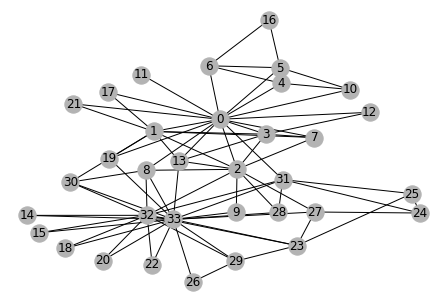

In [ ]:
import networkx as nx
# Since the actual graph is undirected, we convert it for visualization
# purpose.
nx_G = G.to_networkx().to_undirected()
# Kamada-Kawaii layout usually looks pretty for arbitrary graphs
pos = nx.kamada_kawai_layout(nx_G)
nx.draw(nx_G, pos, with_labels=True, node_color=[[.7, .7, .7]])

In [ ]:
# In DGL, you can add features for all nodes at once, using a feature tensor that
# batches node features along the first dimension. The code below adds the learnable
# embeddings for all nodes:

import torch
import torch.nn as nn
import torch.nn.functional as F

embed = nn.Embedding(34, 5)  # 34 nodes with embedding dim equal to 5
G.ndata['feat'] = embed.weight

In [ ]:
# print out node 2's input feature
print(G.ndata['feat'][2])

# print out node 10 and 11's input features
print(G.ndata['feat'][[10, 11]])

tensor([ 1.4268,  0.9392,  1.3498,  0.2932, -0.2116], grad_fn=<SelectBackward>)
tensor([[ 1.0307, -0.3410,  0.3748, -1.3645,  0.9407],
        [-1.8234,  0.2336,  2.4668, -0.3565,  1.5841]],
       grad_fn=<IndexBackward>)


In [ ]:
from dgl.nn.pytorch import GraphConv

In [ ]:
class GCN(nn.Module):
    def __init__(self, in_feats, hidden_size, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GraphConv(in_feats, hidden_size)
        self.conv2 = GraphConv(hidden_size, num_classes)

    def forward(self, g, inputs):
        h = self.conv1(g, inputs)
        h = torch.relu(h)
        h = self.conv2(g, h)
        return h

# The first layer transforms input features of size of 5 to a hidden size of 5.
# The second layer transforms the hidden layer and produces output features of
# size 2, corresponding to the two groups of the karate club.
net = GCN(5, 5, 2)

In [ ]:
inputs = embed.weight
labeled_nodes = torch.tensor([0, 3,5,20,22,25,33])  # only the instructor and the president nodes are labeled
labels = torch.tensor([0, 0,0,1,1,0,1])  # their labels are different

In [ ]:
import itertools

optimizer = torch.optim.Adam(itertools.chain(net.parameters(), embed.parameters()), lr=0.01)
all_logits = []
for epoch in range(50):
    logits = net(G, inputs)
    # we save the logits for visualization later
    all_logits.append(logits.detach())
    logp = F.log_softmax(logits, 1)
    # we only compute loss for labeled nodes
    loss = F.nll_loss(logp[labeled_nodes], labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print('Epoch %d | Loss: %.4f' % (epoch, loss.item()))

Epoch 0 | Loss: 0.6395
Epoch 1 | Loss: 0.6165
Epoch 2 | Loss: 0.5940
Epoch 3 | Loss: 0.5747
Epoch 4 | Loss: 0.5556
Epoch 5 | Loss: 0.5368
Epoch 6 | Loss: 0.5192
Epoch 7 | Loss: 0.5036
Epoch 8 | Loss: 0.4885
Epoch 9 | Loss: 0.4735
Epoch 10 | Loss: 0.4595
Epoch 11 | Loss: 0.4463
Epoch 12 | Loss: 0.4338
Epoch 13 | Loss: 0.4222
Epoch 14 | Loss: 0.4113
Epoch 15 | Loss: 0.4010
Epoch 16 | Loss: 0.3910
Epoch 17 | Loss: 0.3813
Epoch 18 | Loss: 0.3716
Epoch 19 | Loss: 0.3620
Epoch 20 | Loss: 0.3524
Epoch 21 | Loss: 0.3428
Epoch 22 | Loss: 0.3334
Epoch 23 | Loss: 0.3246
Epoch 24 | Loss: 0.3164
Epoch 25 | Loss: 0.3086
Epoch 26 | Loss: 0.3010
Epoch 27 | Loss: 0.2935
Epoch 28 | Loss: 0.2860
Epoch 29 | Loss: 0.2787
Epoch 30 | Loss: 0.2714
Epoch 31 | Loss: 0.2642
Epoch 32 | Loss: 0.2572
Epoch 33 | Loss: 0.2503
Epoch 34 | Loss: 0.2439
Epoch 35 | Loss: 0.2378
Epoch 36 | Loss: 0.2320
Epoch 37 | Loss: 0.2264
Epoch 38 | Loss: 0.2210
Epoch 39 | Loss: 0.2158
Epoch 40 | Loss: 0.2107
Epoch 41 | Loss: 0.2056
Ep

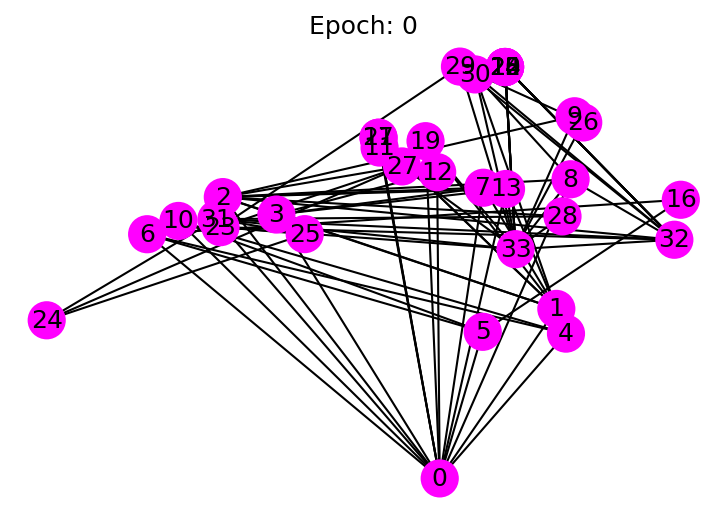

In [ ]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt

def draw(i):
    cls1color = '#00FFFF'
    cls2color = '#FF00FF'
    pos = {}
    colors = []
    for v in range(34):
        pos[v] = all_logits[i][v].numpy()
        cls = pos[v].argmax()
        colors.append(cls1color if cls else cls2color)
    ax.cla()
    ax.axis('off')
    ax.set_title('Epoch: %d' % i)
    nx.draw_networkx(nx_G.to_undirected(), pos, node_color=colors,
            with_labels=True, node_size=300, ax=ax)

fig = plt.figure(dpi=150)
fig.clf()
ax = fig.subplots()
draw(0)  # draw the prediction of the first epoch


In [ ]:
from IPython.display import HTML
ani = animation.FuncAnimation(fig, draw, frames=len(all_logits), interval=200)
HTML(ani.to_html5_video())